In [86]:
#import basic packages
import pandas as pd
import seaborn as sns
import numpy as np
import math

#to apply normalization and standarization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import make_column_selector as selector, TransformedTargetRegressor

#encoding categorical variables 
from sklearn.preprocessing import OneHotEncoder

#feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

#to build and validate a KNN model
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


#visualizations
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import matplotlib.pyplot as plt

In [87]:
#read the cleaned df
df = pd.read_csv('df_cleaned.csv')

In [88]:
#explore columns and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   airline           10462 non-null  object
 1   embarked          10462 non-null  object
 2   destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   stops             10462 non-null  object
 5   journey_year      10462 non-null  int64 
 6   journey_month     10462 non-null  int64 
 7   journey_day       10462 non-null  int64 
 8   weekday           10462 non-null  int64 
 9   dep_hour          10462 non-null  int64 
 10  dep_min           10462 non-null  int64 
 11  departure_period  10462 non-null  object
 12  Arrival_hour      10462 non-null  int64 
 13  Arrival_min       10462 non-null  int64 
 14  arrival_period    10462 non-null  object
 15  Arrived_next_day  10462 non-null  bool  
 16  duration_hours    10462 non-null  int64 
 17  duration_min

In [89]:
#display the df
df.head()

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,2019,3,24,6,22,...,night,1,10,late night,True,2,50,170,3898,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,2019,5,1,2,5,...,early morning,13,15,After noon,False,7,25,445,7663,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,2019,6,9,6,9,...,morning,4,25,late night,True,19,0,1140,13883,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,2019,5,12,6,18,...,evening,23,30,night,False,5,25,325,6219,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,2019,3,1,4,16,...,After noon,21,35,night,False,4,45,285,13303,No info


In [90]:
#drop Arrived_nex_day since it's boolean dtype
df.drop(['Arrived_next_day'], axis=1, inplace=True)

In [91]:
#drop Route
df.drop(['Route'], axis=1, inplace=True)

In [92]:
#drop additional_info
df.drop(['additional_info'], axis=1, inplace=True)

ML modeling process

**split data**

In [93]:
#70% train set, 20% test set
train, test = train_test_split(df, train_size=0.7, random_state=123)

In [94]:
# separate features and target
X_train = train.drop("price", axis=1)
y_train = train[["price"]]

In [95]:
#check the number of columns and instances of each set
print(X_train.shape)
print(y_train.shape)

(7323, 17)
(7323, 1)


/tmp/ipykernel_1269/3151740729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1269/3151740729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


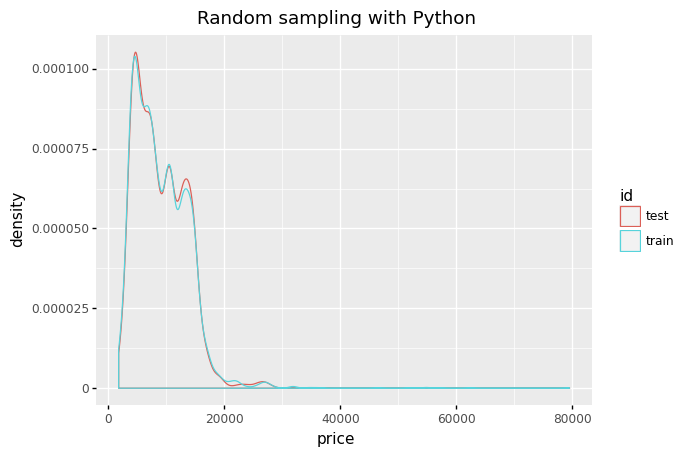

<ggplot: (8752242228490)>

In [96]:
#display the distribution of our split. similar but not identical!
train['id'] = 'train'
test['id'] = 'test'

(ggplot(pd.concat([train, test]), aes('price', color='id'))
 + geom_density()
 + ggtitle("Random sampling with Python"))

**Target engineering**

In [97]:
#explore basic statistics of our target 
y_train.describe()

,price
count,7323.000000
mean,9039.892257
std,4737.526457
min,1760.000000
25%,5225.000000
50%,8267.000000
75%,12296.000000
max,79513.000000


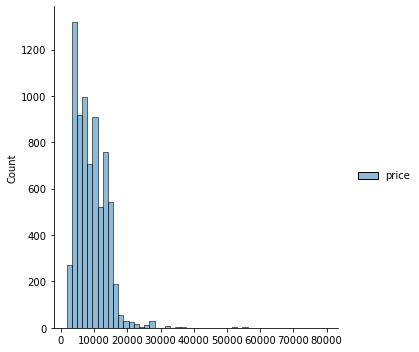

In [98]:
#explore distribution of target
target_dist= sns.displot(y_train, bins=50)
plt.show()

**Normalize target**

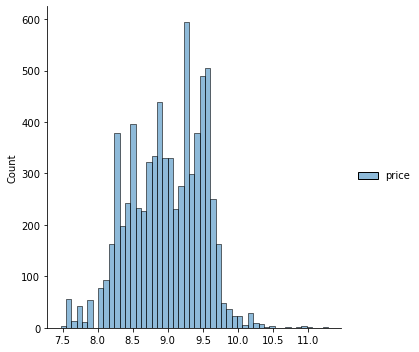

In [99]:
y_train = np.log(y_train)
sns.displot(y_train, bins= 50)

**Standarize target**

In [100]:
scaler = StandardScaler()
y_train=scaler.fit_transform(y_train)

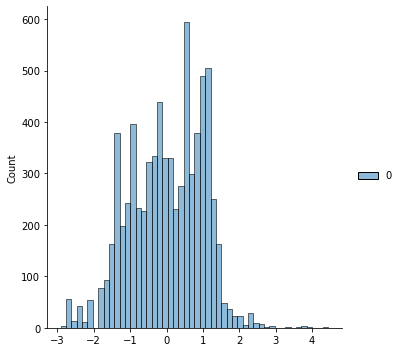

In [101]:
#we can see the target is now standarized
sns.displot(y_train, bins=50)
plt.show()

In [102]:
y_train.dtype

dtype('float64')

In [103]:
#check the new parameters
print(y_train.mean())
print(y_train.max())
print(y_train.min())

-1.0876941237021335e-15
4.441183825943805
-2.9063763517299024


**Fature engineering and selection**

**Standarize and encode features**

In [104]:
#now standarize all non-time features and on-hot encode all the other features
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
    ("one-hot", OneHotEncoder(), selector(dtype_include="object")),
    ("scale", StandardScaler(), selector(dtype_include="number")),
  ])

In [105]:
#apply the pipeline above to X_train
X_train_encoded = preprocessor.fit_transform(X_train)

In [106]:
X_train_encoded.view()

array([[ 0.        ,  0.        ,  0.        , ..., -0.71778889,
         0.10888781, -0.71695988],
       [ 1.        ,  0.        ,  0.        , ..., -0.95746096,
         1.29327022, -0.91748186],
       [ 0.        ,  0.        ,  0.        , ...,  0.36073543,
        -0.48330339,  0.34580664],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.12106336,
        -1.37159019,  0.07510196],
       [ 0.        ,  0.        ,  0.        , ...,  0.48057147,
        -1.37159019,  0.43604153],
       [ 0.        ,  0.        ,  0.        , ...,  0.12106336,
         0.10888781,  0.12523246]])

In [107]:
X_train_encoded.shape

(7323, 51)

In [108]:
print(X_train_encoded.min())
print(X_train_encoded.mean())
print(X_train_encoded.max())

-2.1638370341917015
0.11764705882352941
4.476559516231364


**Feature filtering** 

In [109]:
nzv = VarianceThreshold(threshold=0.1)
near_zero = nzv.fit_transform(X_train_encoded)
near_zero

array([[ 0.        ,  0.        ,  0.        , ..., -0.71778889,
         0.10888781, -0.71695988],
       [ 0.        ,  0.        ,  0.        , ..., -0.95746096,
         1.29327022, -0.91748186],
       [ 0.        ,  0.        ,  1.        , ...,  0.36073543,
        -0.48330339,  0.34580664],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.12106336,
        -1.37159019,  0.07510196],
       [ 0.        ,  1.        ,  0.        , ...,  0.48057147,
        -1.37159019,  0.43604153],
       [ 0.        ,  0.        ,  0.        , ...,  0.12106336,
         0.10888781,  0.12523246]])

**Build and fit a KNN model**

In [110]:
knn = KNeighborsRegressor(n_neighbors=10)

In [111]:
m1 = knn.fit(X_train_encoded,y_train)

In [112]:
m1.predict(X_train_encoded)

array([[-0.60426556],
       [-1.0936124 ],
       [ 0.77741584],
       ...,
       [ 0.61095562],
       [-0.19252559],
       [ 0.21542684]])

In [113]:
#calculate MSE
pred = m1.predict(X_train_encoded)
mse = mean_squared_error(y_train, pred)
mse

0.158819858908483

In [114]:
#calculate RMSE
math.sqrt(mse)

0.3985220933756157

**Validation using kFold cross validation**

In [115]:
# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
cv = KFold(n_splits=10, random_state=123, shuffle=True)

# fit model with 10-fold CV
scores = cross_val_score(m1, X_train_encoded, y_train, cv=cv, scoring=loss)
scores

array([-0.46843163, -0.44295506, -0.45614796, -0.43439296, -0.43048584,
       -0.44122091, -0.41846714, -0.44886267, -0.48753383, -0.47863864])

In [116]:
#averga eRMSE across 10 folds
scores.mean()

-0.45071366470017116

In [117]:
#RMSE vlaues across 50 folds
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
rfk_scores = cross_val_score(m1, X_train_encoded, y_train, cv=rfk, scoring=loss)
rfk_scores

array([-0.46843163, -0.44295506, -0.45614796, -0.43439296, -0.43048584,
       -0.44122091, -0.41846714, -0.44886267, -0.48753383, -0.47863864,
       -0.46699434, -0.45201438, -0.49812925, -0.44922841, -0.42253628,
       -0.42866099, -0.45479276, -0.42809028, -0.44262774, -0.47775582,
       -0.45952259, -0.40250255, -0.48622761, -0.45348041, -0.43737358,
       -0.49040667, -0.45591175, -0.44692201, -0.44935508, -0.44888487,
       -0.45157549, -0.48655076, -0.41657509, -0.46808425, -0.40517057,
       -0.4396858 , -0.44567383, -0.47623056, -0.43511141, -0.48975346,
       -0.43751071, -0.43328873, -0.47657355, -0.40956817, -0.45336284,
       -0.46048285, -0.47056276, -0.44827435, -0.44983509, -0.48891511])

In [118]:
#average RMSE across 50 folds
rfk_scores.mean()

-0.4520267877533462

**Hyperparameter tuning**

In [119]:
#creating grid for GridSearch
hyper_grid = {'n_neighbors': range(2, 26)}

#tuning
grid_search = GridSearchCV(knn, hyper_grid, cv=cv, scoring=loss)
results = grid_search.fit(X_train_encoded, y_train)

#best model's cross validated RMSE
abs(results.best_score_)

0.44084573091579815

In [120]:
# Best model's k
results.best_estimator_.get_params().get('n_neighbors')

6

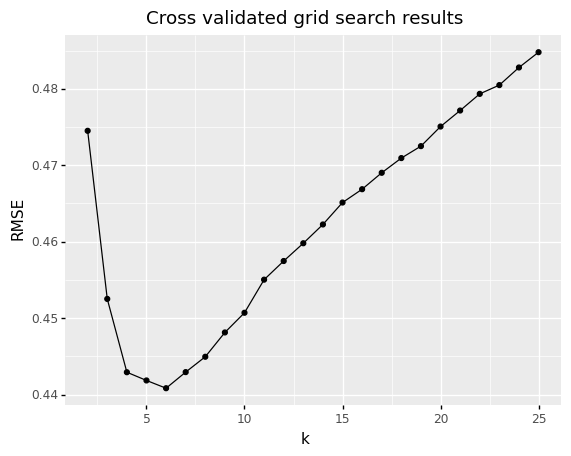

<ggplot: (8752241992494)>

In [121]:
# Plot RMSE results (notice best RMSE is 0.440845 at K = 6)
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))